# Study Gradient Descent

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
house_size = [1100, 1400, 1425, 1550, 1600, 1700, 1700, 1875, 2350, 2450]
house_price = [199000, 245000, 319000, 240000, 312000, 279000, 310000, 308000, 405000, 324000]

house_df = pd.DataFrame({'house_size': house_size, 'house_price': house_price})

house_df

,house_size,house_price
0,1100,199000
1,1400,245000
2,1425,319000
3,1550,240000
4,1600,312000
5,1700,279000
6,1700,310000
7,1875,308000
8,2350,405000
9,2450,324000


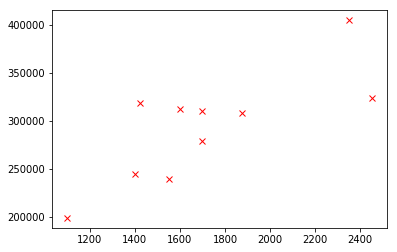

In [12]:
plt.plot(house_df.house_size, house_df.house_price, 'rx')

In [39]:
def normalization_min_max(p_serial):
    v_max = p_serial.max()
    v_min = p_serial.min()
    v_diff = v_max - v_min
    return p_serial.apply(lambda x: round((x - v_min) / v_diff, 2))

def plot_line(p_plt, p_a, p_b):
    x = np.linspace(0, 1, 100)
    y = p_a + p_b * x
    p_plt.plot(x, y)

def iterate_theta(theta0, theta1, learning_rate, x, y):
    predict_price = theta0 + theta1 * x;
    new_theta0 = theta0 - (predict_price - y).sum() / predict_price.count()
    new_theta1 = theta1 - ((predict_price * x - y * x).sum() / predict_price.size)
    return round(new_theta0, 2), round(new_theta1, 2)

In [40]:
house_df['normalization_size'] = normalization_min_max(house_df.house_size)
house_df['normalization_price'] = normalization_min_max(house_df.house_price)
house_df

,house_size,house_price,normalization_size,normalization_price
0,1100,199000,0.00,0.00
1,1400,245000,0.22,0.22
2,1425,319000,0.24,0.58
3,1550,240000,0.33,0.20
4,1600,312000,0.37,0.55
5,1700,279000,0.44,0.39
6,1700,310000,0.44,0.54
7,1875,308000,0.57,0.53
8,2350,405000,0.93,1.00
9,2450,324000,1.00,0.61


In [57]:
# a, b = iterate_theta(0, 0, 0.01, house_df.normalization_size, house_df.normalization_price)
# print(a, b)
# a, b = iterate_theta(0.46, 0.27, 0.01, house_df.normalization_size, house_df.normalization_price)
# print(a, b)
# a, b = iterate_theta(0.34, 0.25, 0.01, house_df.normalization_size, house_df.normalization_price)
# print(a, b)
a, b = 0, 0
for x in range(25):
    a, b = iterate_theta(a, b, 0.01, house_df.normalization_size, house_df.normalization_price)
    print(a, b, ((a + b * house_df.normalization_size) - house_df.normalization_price).sum())

0.46 0.27 1.2058
0.34 0.25 -0.08499999999999985
0.35 0.29 0.19659999999999955
0.33 0.32 0.13280000000000014
0.32 0.35 0.1689999999999997
0.3 0.37 0.059799999999999576
0.29 0.4 0.09599999999999975
0.28 0.42 0.08679999999999999
0.27 0.44 0.0776
0.26 0.46 0.06840000000000002
0.25 0.48 0.059199999999999864
0.24 0.5 0.04999999999999982
0.24 0.52 0.14079999999999987
0.23 0.53 0.08620000000000028
0.22 0.54 0.03160000000000007
0.22 0.55 0.07700000000000001
0.21 0.56 0.022400000000000087
0.21 0.57 0.06779999999999964
0.2 0.58 0.013199999999999878
0.2 0.59 0.05859999999999993
0.19 0.6 0.004000000000000059
0.19 0.61 0.049399999999999944
0.19 0.62 0.09479999999999988
0.18 0.62 -0.0052000000000002045
0.18 0.63 0.0401999999999999


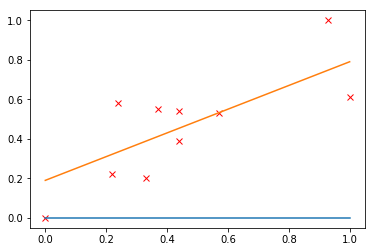

In [58]:
plt.plot(house_df.normalization_size, house_df.normalization_price, 'rx')
plot_line(plt, 0, 0)
# plot_line(plt, 0.46, 0.27)
# plot_line(plt, 0.34, 0.25)
# plot_line(plt, 0.26, 0.46)
plot_line(plt, 0.19, 0.6)